In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
customer = pd.read_csv('/content/Mall_Customers.csv.csv')
customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer.shape

(200, 5)

In [4]:
customer.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
sns.set(style="whitegrid")

<ipython-input-7-58abfaa5ee34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer['Age'],color= 'green',bins=20)


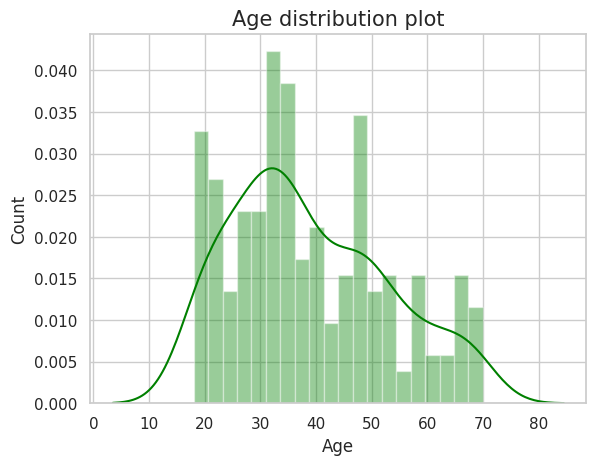

In [7]:
sns.distplot(customer['Age'],color= 'green',bins=20)
plt.title('Age distribution plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

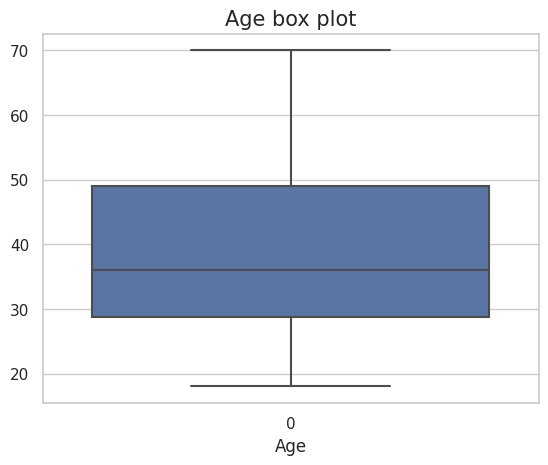

In [8]:
sns.boxplot(customer['Age'])
plt.title('Age box plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.show()

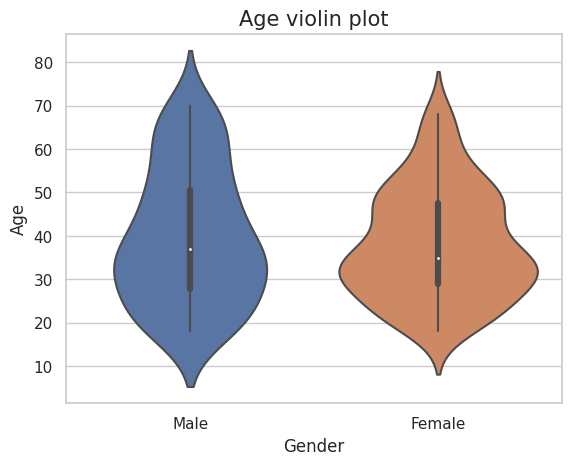

In [9]:
sns.violinplot(y = 'Age' , x = 'Genre' , data = customer)
plt.title('Age violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.show()

<ipython-input-10-a0f1dd458806>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer['Spending Score (1-100)'],color= 'orange',bins=20)


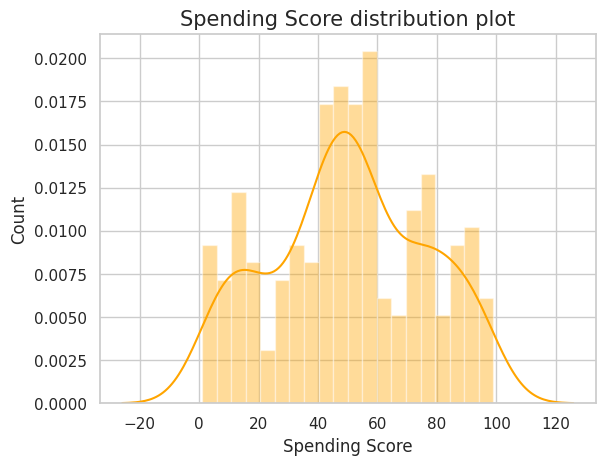

In [10]:
sns.distplot(customer['Spending Score (1-100)'],color= 'orange',bins=20)
plt.title('Spending Score distribution plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

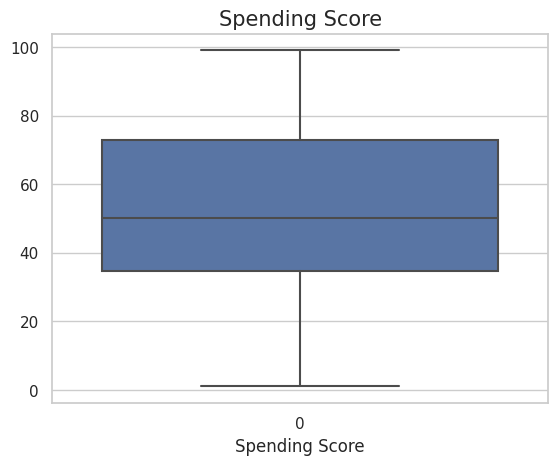

In [11]:
sns.boxplot(customer['Spending Score (1-100)'])
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.show()

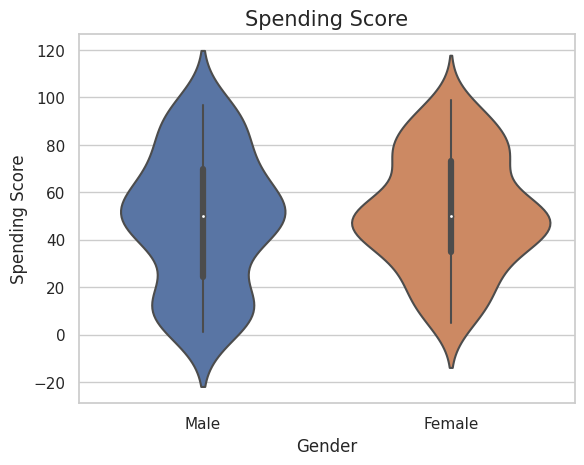

In [12]:
sns.violinplot(y = 'Spending Score (1-100)' , x = 'Genre' , data = customer)
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

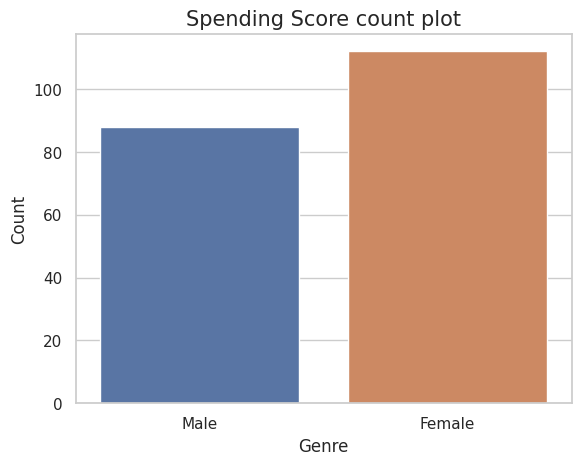

In [13]:
sns.countplot(x='Genre', data=customer)
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

<Axes: >

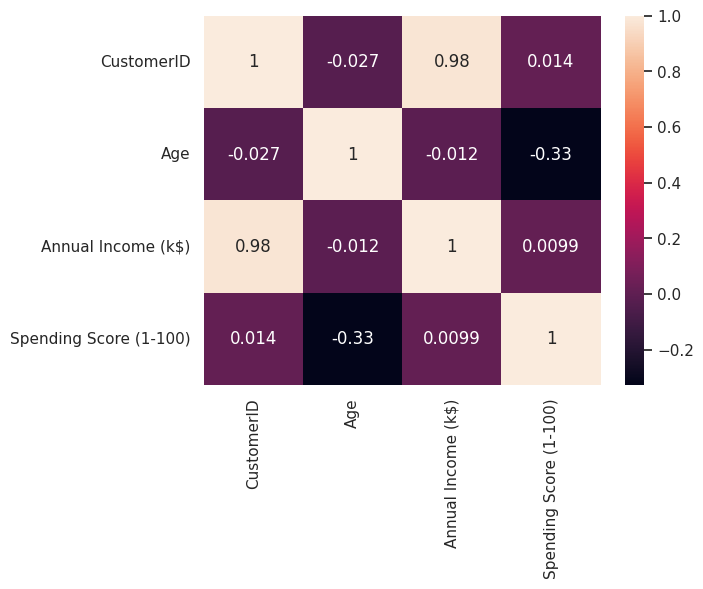

In [14]:
sns.heatmap(customer.corr(), annot = True)

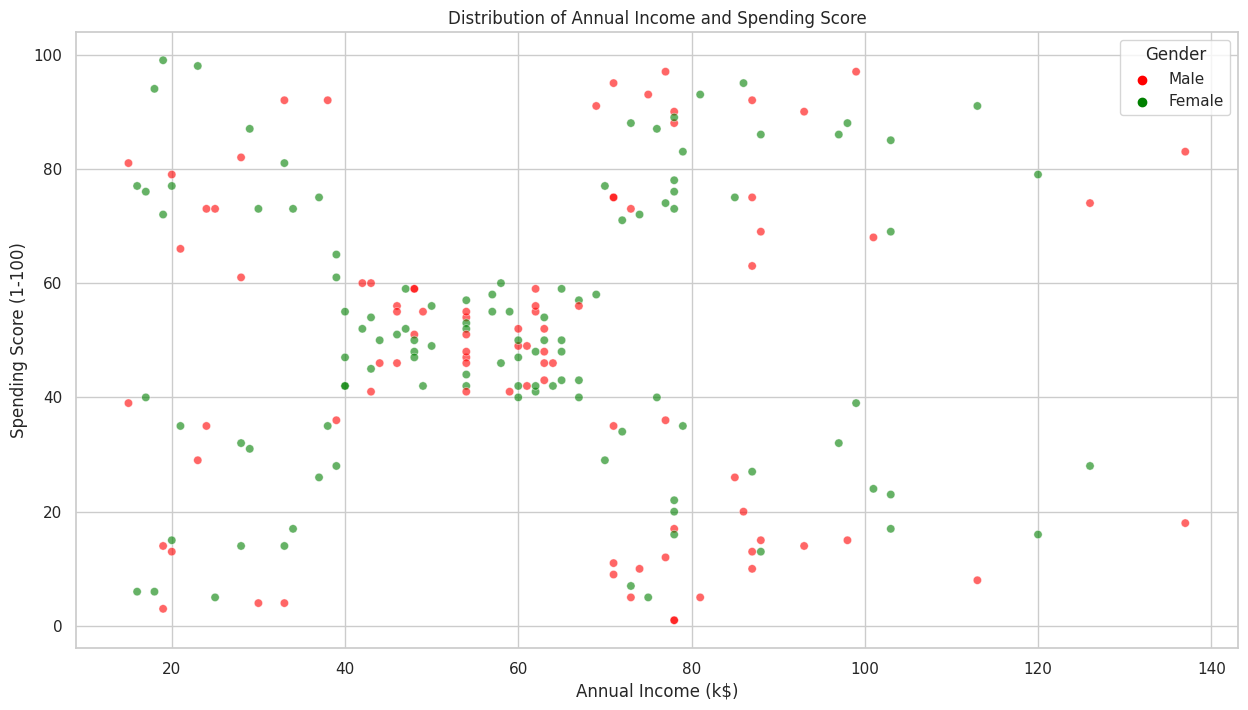

In [15]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer, hue='Genre', palette=['red', 'green'], alpha=0.6)
plt.title('Distribution of Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Gender')
plt.show()

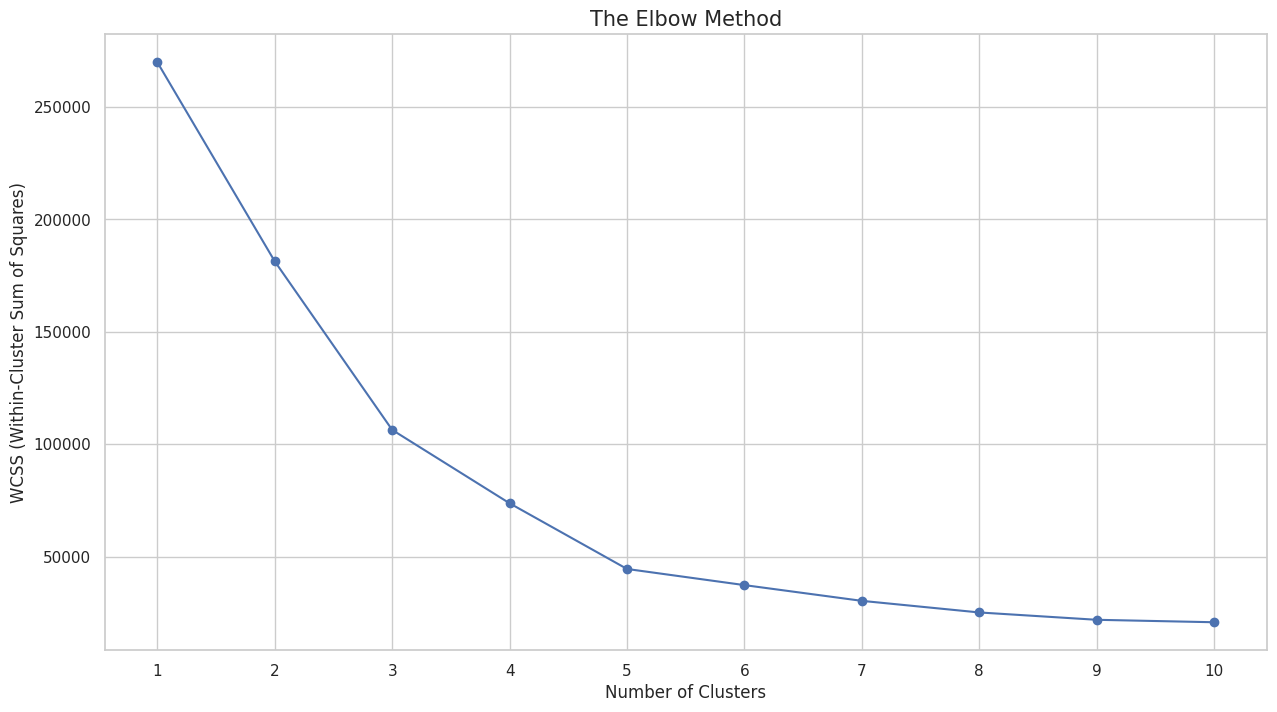

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Income_Spend = customer[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


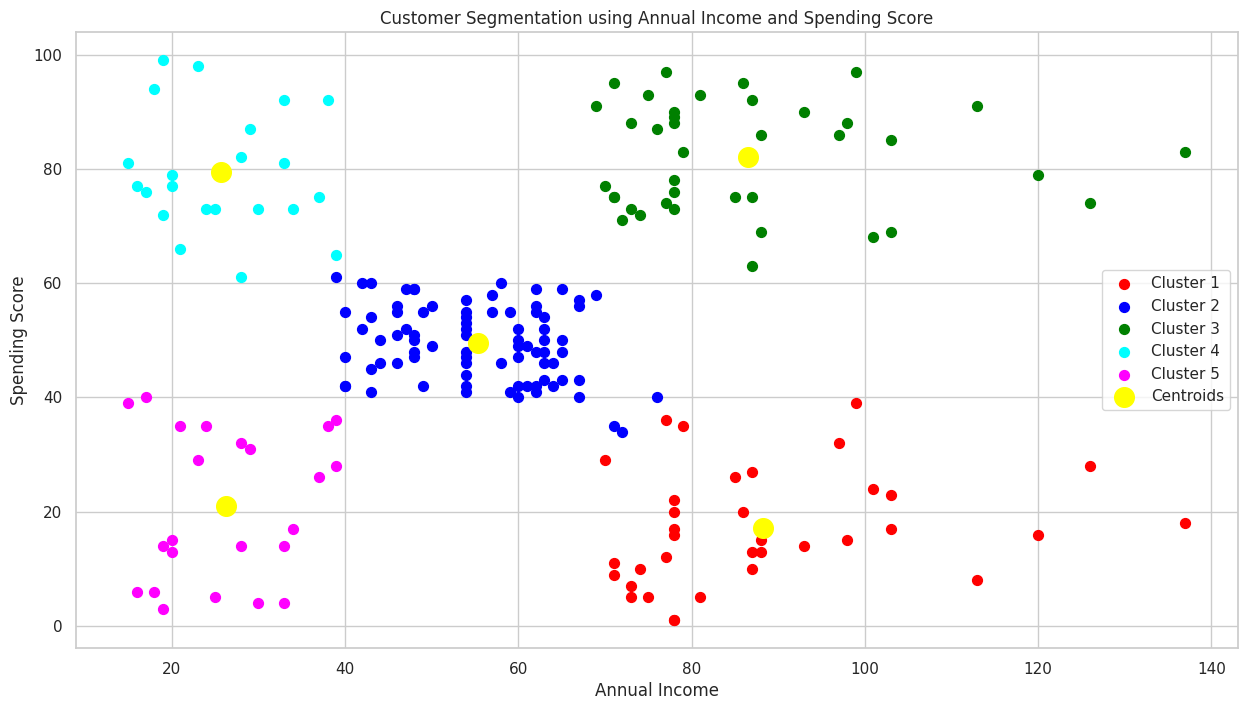

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Income_Spend = customer[['Annual Income (k$)', 'Spending Score (1-100)']]

km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(15, 8))
plt.scatter(Income_Spend.loc[y_means == 0, 'Annual Income (k$)'], Income_Spend.loc[y_means == 0, 'Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(Income_Spend.loc[y_means == 1, 'Annual Income (k$)'], Income_Spend.loc[y_means == 1, 'Spending Score (1-100)'], s=50, c='blue', label='Cluster 2')
plt.scatter(Income_Spend.loc[y_means == 2, 'Annual Income (k$)'], Income_Spend.loc[y_means == 2, 'Spending Score (1-100)'], s=50, c='green', label='Cluster 3')
plt.scatter(Income_Spend.loc[y_means == 3, 'Annual Income (k$)'], Income_Spend.loc[y_means == 3, 'Spending Score (1-100)'], s=50, c='cyan', label='Cluster 4')
plt.scatter(Income_Spend.loc[y_means == 4, 'Annual Income (k$)'], Income_Spend.loc[y_means == 4, 'Spending Score (1-100)'], s=50, c='magenta', label='Cluster 5')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

plt.title('Customer Segmentation using Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


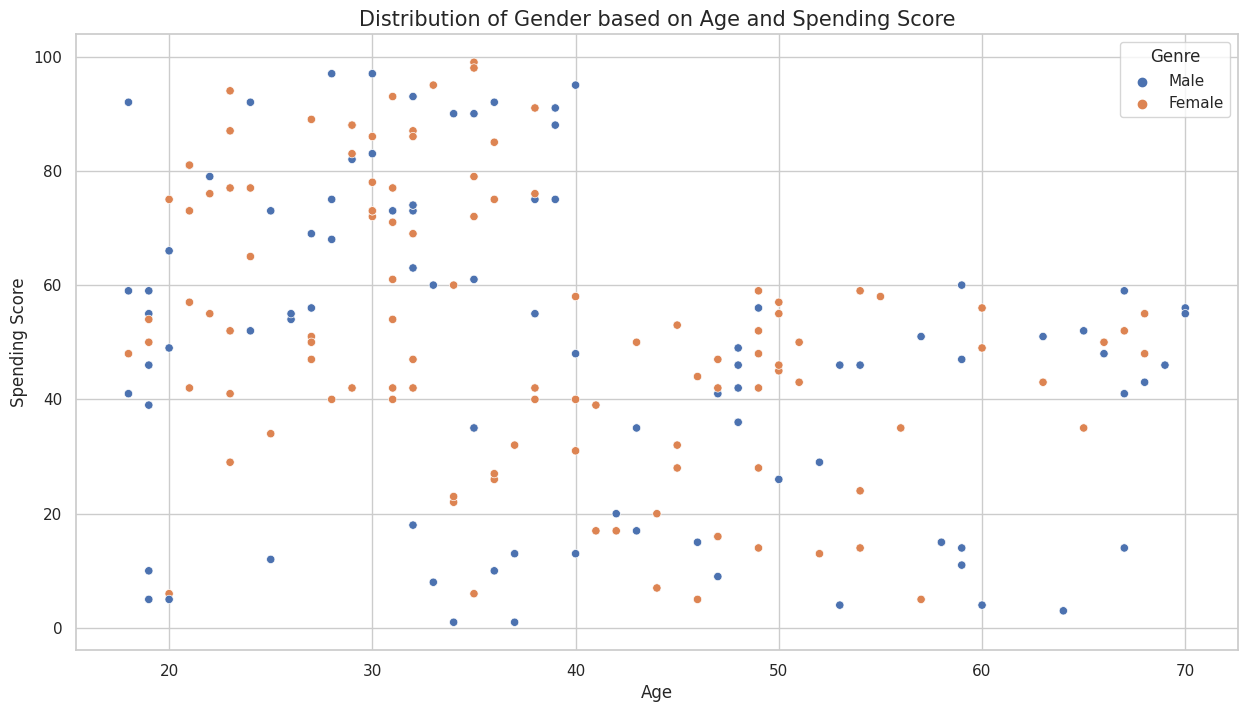

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=customer)
plt.title('Distribution of Gender based on Age and Spending Score', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.show()


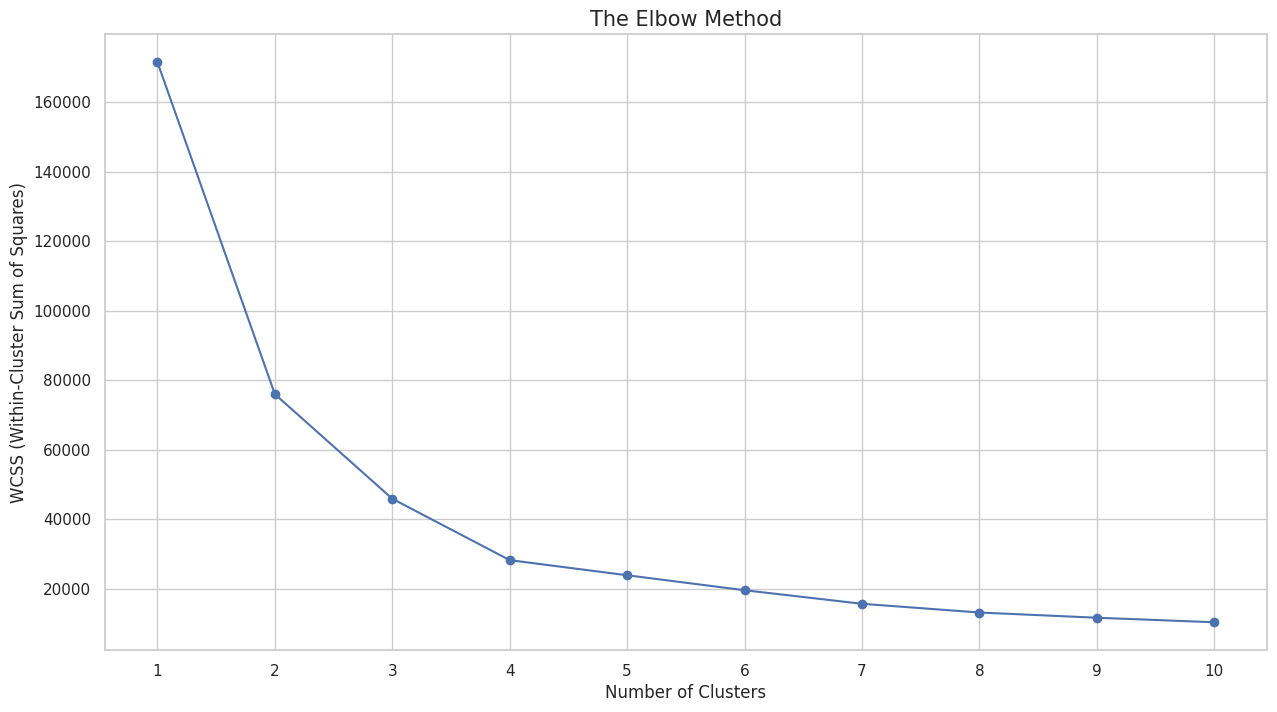

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Age_Spend = customer[['Age', 'Spending Score (1-100)']].iloc[:, :]

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(Age_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [20]:

'''ymeans = km.fit_predict(Age_Spend)
plt.figure(figsize=(15, 8))
plt.scatter(Age_Spend.loc[y_means == 0, ], Age_Spend.loc[y_means == 0, ], s=50, c='red', label='Old Targets 1')
plt.scatter(Age_Spend.loc[y_means == 1, ], Age_Spend.loc[y_means == 1, ], s=50, c='blue', label='Usual Customer 2')
plt.scatter(Age_Spend.loc[y_means == 2, ], Age_Spend.loc[y_means == 2, ], s=50, c='green', label='Regular Customers 3')
plt.scatter(Age_Spend.loc[y_means == 3, ], Age_Spend.loc[y_means == 3, ], s=50, c='cyan', label='Young Targets 4')
'''
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)

ymeans = km.fit_predict(Age_Spend)




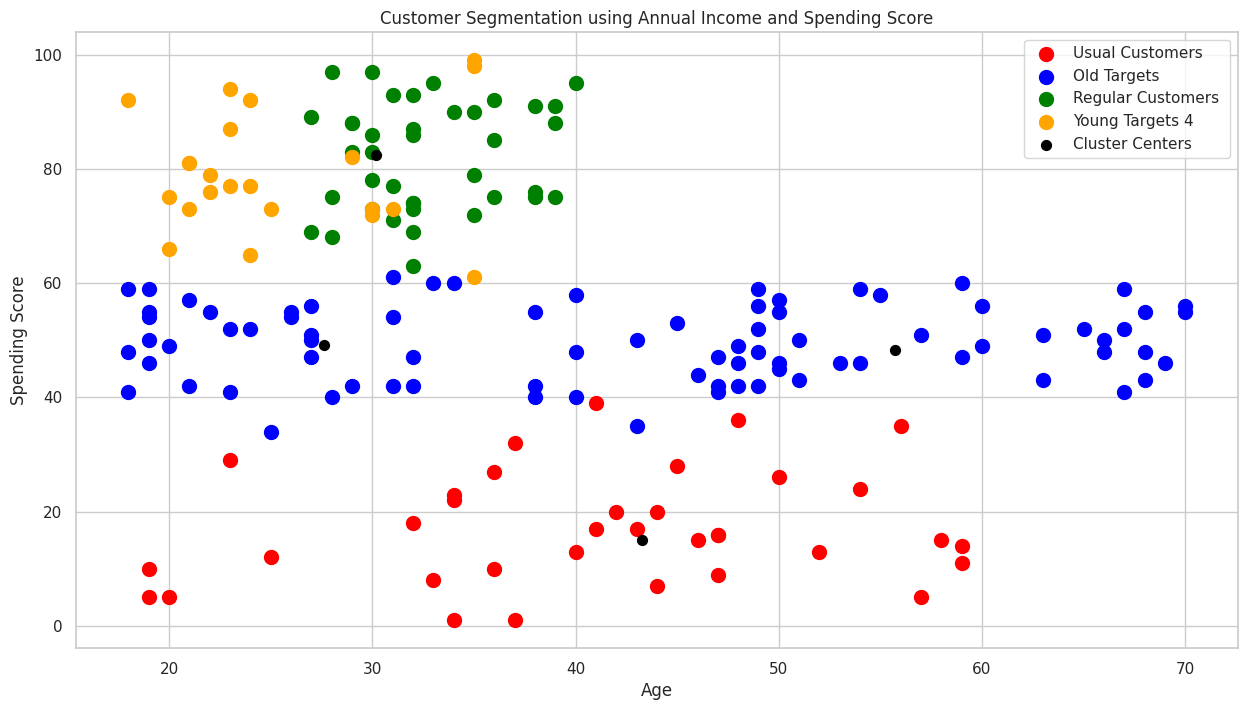

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

plt.scatter(Age_Spend.loc[y_means == 0, 'Age'], Age_Spend.loc[y_means == 0, 'Spending Score (1-100)'], s=100, c='red', label='Usual Customers')
plt.scatter(Age_Spend.loc[y_means == 1, 'Age'], Age_Spend.loc[y_means == 1, 'Spending Score (1-100)'], s=100, c='blue', label='Old Targets')
plt.scatter(Age_Spend.loc[y_means == 2, 'Age'], Age_Spend.loc[y_means == 2, 'Spending Score (1-100)'], s=100, c='green', label='Regular Customers ')
plt.scatter(Age_Spend.loc[y_means == 3, 'Age'], Age_Spend.loc[y_means == 3, 'Spending Score (1-100)'], s=100, c='orange', label='Young Targets 4')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='black', label='Cluster Centers')
plt.legend()
plt.title('Customer Segmentation using Annual Income and Spending Score')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.show()
